## Downloading the Data Files

In these examples we use ChEMBL dataset for compound-proteins activities (IC50). The IC50 values and ECFP fingerprints can be downloaded from these two urls:

In [ ]:
%%bash
wget http://homes.esat.kuleuven.be/~jsimm/chembl-IC50-346targets.mm
wget http://homes.esat.kuleuven.be/~jsimm/chembl-IC50-compound-feat.mm

## Load and plot the .mm files

In [1]:
import smurff
import scipy.io

import scipy.sparse
import numpy

## loading data
ic50 = scipy.io.mmread("chembl-IC50-346targets.mm")
ecfp = scipy.io.mmread("chembl-IC50-compound-feat.mm")

## creating train and test sets
ic50_train, ic50_test = smurff.make_train_test(ic50, 0.2)

## Handy function to plot sparsity pattern

<IPython.core.display.Javascript object>


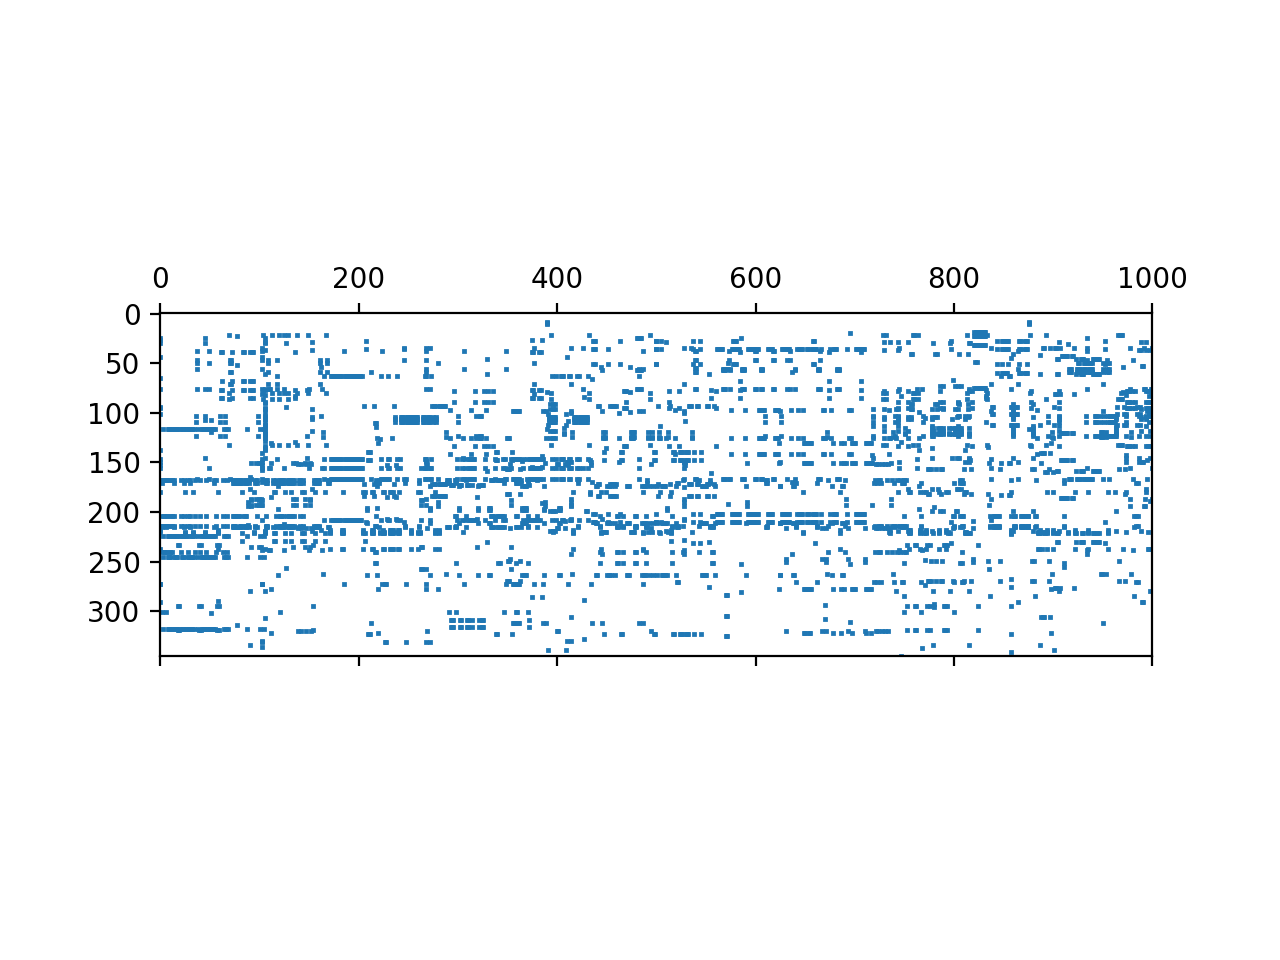

In [2]:
%matplotlib notebook

from matplotlib.pyplot import figure, show
from scipy.sparse import coo_matrix

fig = figure()
ax = fig.add_subplot(111)
ax.spy(ic50.tocsr()[0:1000,:].T, markersize = 1)
show()

In [2]:
%load_ext wurlitzer

In [3]:
import os

## running factorization (Macau)
session = smurff.MacauSession(
                                    ic50_train,
                       Ytest      = ic50_test,
                       side_info  = [ecfp, None],
                       verbose    = 1,
                       num_latent = 4,
                       save_prefix = 'macau-run/save',
                       save_freq  = 1,
                       burnin     = 40,
                       nsamples   = 40,)

predictions = session.run()

rmse = smurff.calc_rmse(predictions)
rmse

1.0192607455441633

<IPython.core.display.Javascript object>


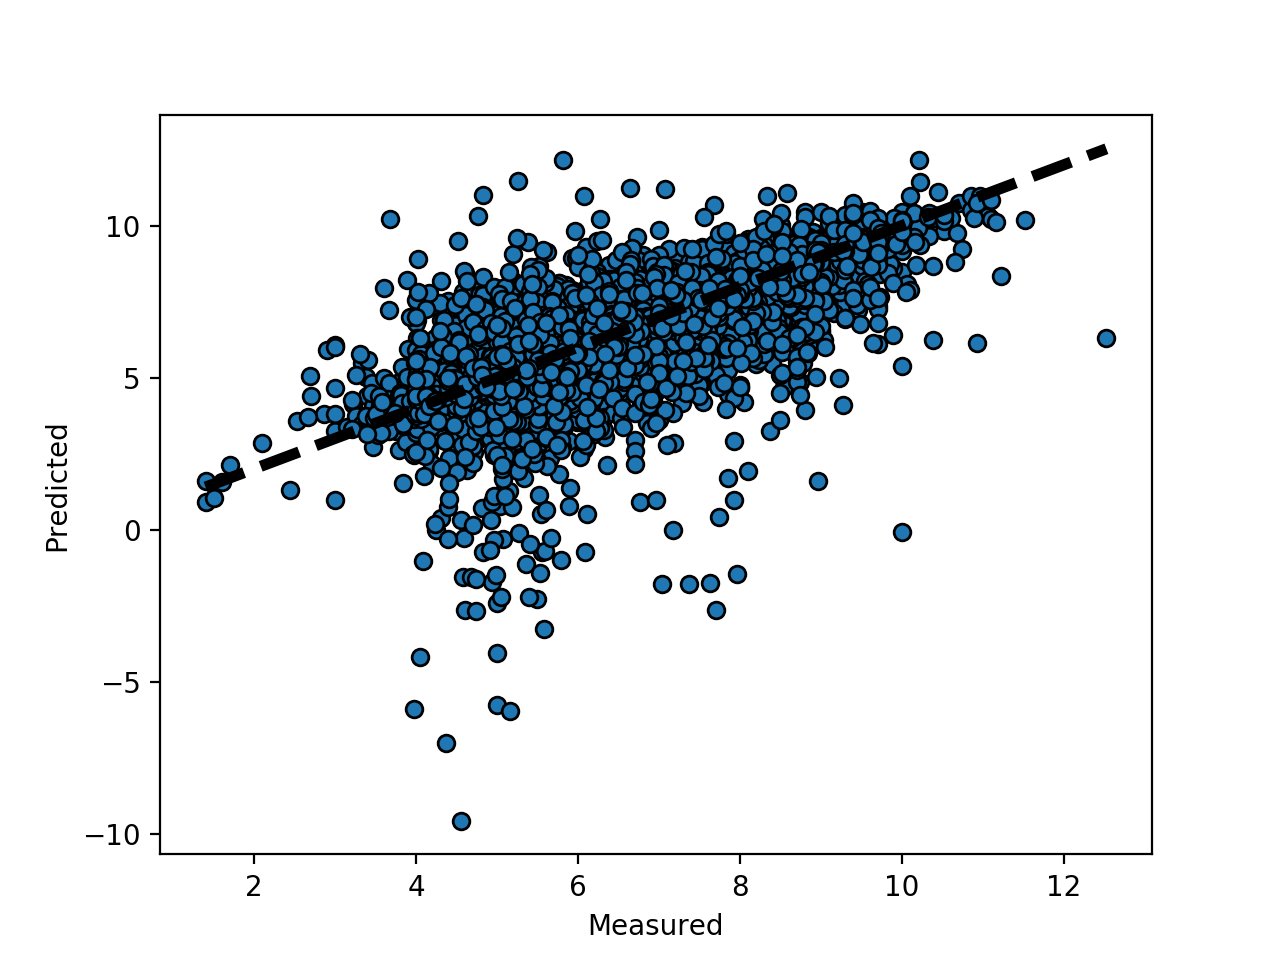

In [4]:
%matplotlib notebook

from matplotlib.pyplot import subplots, show

y = numpy.array([ p.val for p in predictions ])
predicted = numpy.array([ p.pred_avg for p in predictions ])

fig, ax = subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
show()

In [ ]:
psession = session.makePredictSession()

In [ ]:
all = psession.predict_all()
all.shape